# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee = pd.read_csv("./data/Employee.csv")
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
display(employee.groupby("Department").agg({"Salary":"mean"}))

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# Method 2
# your answer here
pd.pivot_table(employee, index="Department", values="Salary")

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
pd.pivot_table(employee, index=["Department", "Title"], values="Salary")

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
pd.pivot_table(employee, index="Title", values="Salary", columns="Years")

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
result = pd.pivot_table(employee, index=['Department', 'Title'], values=['Name', 'Salary'], 
                        aggfunc={'Name': 'count', 'Salary': 'mean'})
result.rename(columns={'Name': 'Employee Count', 'Salary': 'Mean Salary'}, inplace=True)
result

Employee Count  Mean Salary
Department Title                                 
HR         VP                      1         70.0
           analyst                 2         32.5
IT         VP                      1         70.0
           analyst                 2         32.5
           associate               1         60.0
Sales      associate               2         55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your answer here
pd.pivot_table(employee, index=["Department", "Title"], values="Salary", aggfunc=[np.median, np.mean, np.min, np.max, np.std])

median   mean   amin   amax       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

In [9]:
# For the HR department, the median, mean, minimum, and maximum salaries for VP are all 70, which suggests that the salary for this job title 
# is consistent across the sample. The standard deviation is NaN, which means that there is not enough data to calculate the standard deviation.
# For the analyst job title in the HR department, the standard deviation is 3.535534, which indicates that the salaries for this job title 
# have a moderate amount of variation.

# The same can be observed for the IT department and the Sales department. For the Sales department, the minimum, maximum, and median 
# salaries for the associate job title are all 55, with a standard deviation of 0, which indicates that the salaries for this job title 
# are consistent across the sample.

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
# your answer here
a = pd.pivot_table(employee, index=["Department", "Title"], values="Salary", aggfunc=[np.median, np.mean, np.min, np.max, np.std])

In [11]:
a.fillna(0, inplace=True)

In [12]:
a

median   mean   amin   amax       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
IT         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     30     35  3.535534
           associate   60.0   60.0     60     60  0.000000
Sales      associate   55.0   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [13]:
# your answer here
b = pd.pivot_table(employee, index='Department', values=['Name', 'Salary'], 
                        aggfunc={'Name': 'count', 'Salary': 'sum'})

b.rename(columns={'Name': 'Employee Count', 'Salary': 'Salary Spent'}, inplace=True)
b

,Employee Count,Salary Spent
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [14]:
# your answer here
years = pd.pivot_table(employee, index=['Department', 'Title'], values=['Years', 'Salary'], 
                        aggfunc={'Years': 'sum', 'Salary': 'mean'})
years.rename(columns={'Years': 'Total Years of Experience', 'Salary': 'Mean Salary'}, inplace=True)
years

Mean Salary  Total Years of Experience
Department Title                                            
HR         VP                70.0                          8
           analyst           32.5                          6
IT         VP                70.0                          8
           analyst           32.5                          3
           associate         60.0                          7
Sales      associate         55.0                          5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [15]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [16]:
# your answer here
fitbit = pd.read_csv("./data/Fitbit.csv")

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [17]:
# your answer 
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [18]:
fitbit.describe()
# for the numerical columns

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [19]:
fitbit.describe(include=['O'])
# for the non-numerical columns

,Date
count,367
unique,366
top,05-02-2016
freq,2


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [20]:
# your answer here
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
print('Correlation between Minutes Very Active and Steps:', correlation)

Correlation between Minutes Very Active and Steps: 0.5714518481062606


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

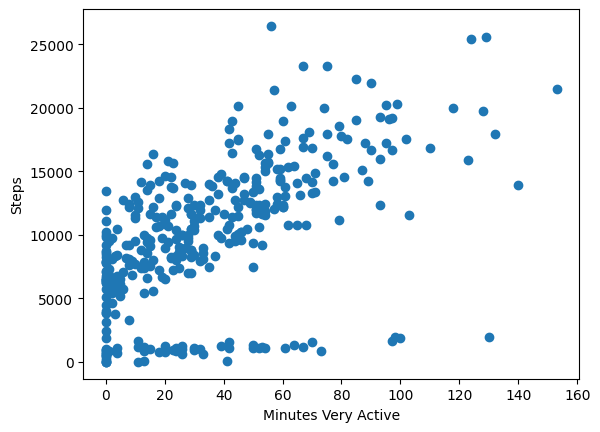

In [21]:
# your answer here
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [22]:
# your answer here
# The scatter plot shows that there is a high density of data points between 0-60 minutes of very active activity, 
# with a high number of steps taken. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here
correlation_2 = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
print('Correlation between Minutes Sedentary and Steps:', correlation_2)

Correlation between Minutes Sedentary and Steps: 0.07690608062990097


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

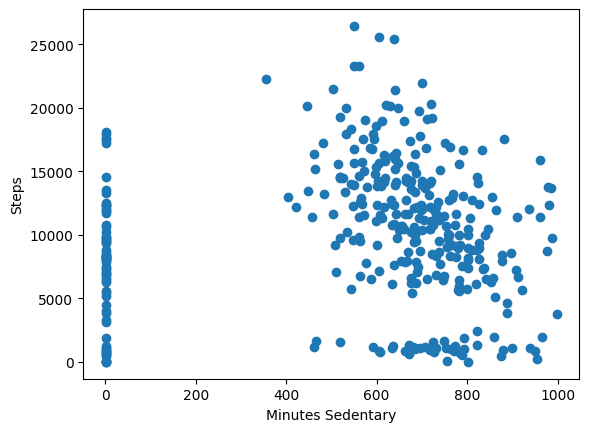

In [24]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()

# There's a very weak linear relationship between these two variables and the plot shows this as well.
# Other factors could be affecting the number of steps taken


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [25]:
# your answer here
correlation_3 = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
print('Correlation between MinutesOfSleep and Steps:', correlation_3)

Correlation between MinutesOfSleep and Steps: 0.13098565950836388


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

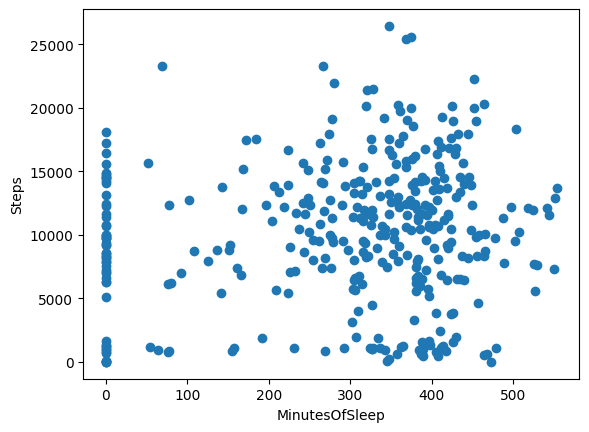

In [26]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

# There is not a clear linear relationship between these two variables and other factors could be affecting the number of steps taken.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [27]:
# your answer here
subset = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit = subset.corr()

In [28]:
subset.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


In [29]:
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [30]:
# your answer here
cor_fit_steps = cor_fit[['Steps']]
cor_fit_steps.sort_values(by='Steps', ascending=False)

,Steps
Steps,1.000000
Minutes Very Active,0.571452
Floors,0.306511
Calorie burned,0.255305
MinutesOfSleep,0.130986
Minutes Sedentary,0.076906


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [31]:
# your answer here
time_grades = pd.read_csv("./data/Time_grades.csv")

In [32]:
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

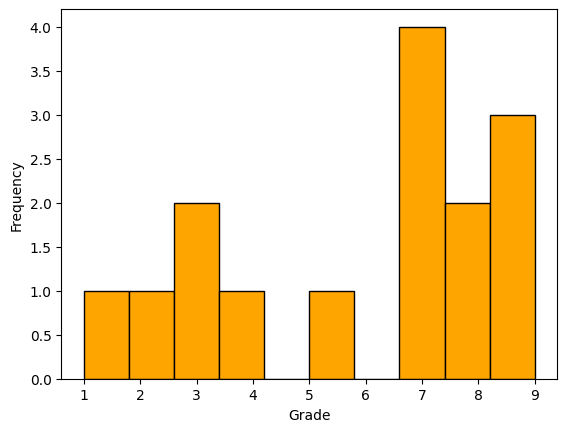

In [33]:
# your answer here
plt.hist(time_grades['Grade'], bins=10, color='orange', edgecolor='black')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [34]:
# your answer here
pearson_corr = time_grades['Study time'].corr(time_grades['Grade'], method='pearson')
spearman_corr = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

print("Pearson Correlation: ", pearson_corr)
print("Spearman Correlation: ", spearman_corr)

Pearson Correlation:  0.7980456073578858
Spearman Correlation:  0.819658753036942


In [35]:
# Both Pearson and Spearman correlation results show that there is a positive correlation between study time and grade.
# We can be conclude that as study time increases, the grade also increases.

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

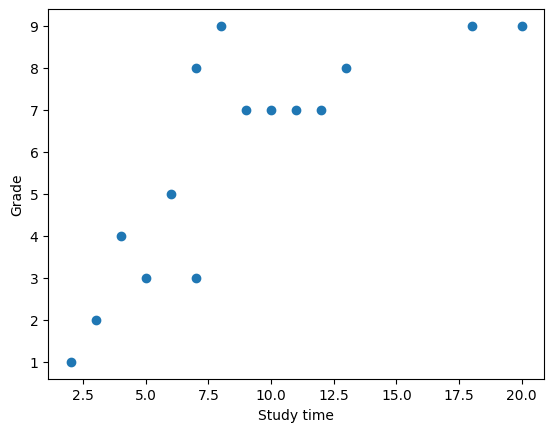

In [36]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [37]:
# The scatter plot shows a positive linear relationship between the two variables. The higher the study time, the higher the grade. 

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [38]:
# your answer here

# Pearson correlation measures the linear association between two continuous variables. It ranges from -1 to 1, where -1 indicates a strong 
# negative correlation, 1 indicates a strong positive correlation, and 0 indicates no linear correlation. 

# Spearman correlation, on the other hand, measures the rank association between two variables. It's good to use when the relationship 
# between the variables is non-linear or when the variables are not normally distributed. 
# It also ranges from -1 to 1.